In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('student_exam_scores.csv')
df.head()

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3


In [5]:
print('Forma da coluna: ', df.shape)
print('Descrição das colunas:\n')
df.describe()

Forma da coluna:  (200, 6)
Descrição das colunas:



,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [6]:
print('Informações das coluns: \n:')
df.info()

Informações das coluns: 
:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          200 non-null    object 
 1   hours_studied       200 non-null    float64
 2   sleep_hours         200 non-null    float64
 3   attendance_percent  200 non-null    float64
 4   previous_scores     200 non-null    int64  
 5   exam_score          200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


É possível observar que todas as colunas não tem valores nulos ou faltantes

In [ ]:
df.isnull().sum()

,0
student_id,0
hours_studied,0
sleep_hours,0
attendance_percent,0
previous_scores,0
exam_score,0


In [ ]:
df.isna().sum()

,0
student_id,0
hours_studied,0
sleep_hours,0
attendance_percent,0
previous_scores,0
exam_score,0


Estou removendo a coluna de id do estudante e as duplicatas se houver, pois será irrelevante para esta análise

In [ ]:
df_students = df.drop_duplicates()
df_students =  df_students.drop('student_id', axis=1)
df_students.head()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,8.0,8.8,72.1,45,30.2
1,1.3,8.6,60.7,55,25.0
2,4.0,8.2,73.7,86,35.8
3,3.5,4.8,95.1,66,34.0
4,9.1,6.4,89.8,71,40.3


`std` - mostra o quão distante os valores de um conjunto de dados estão, em média, da média desse conjunto.

In [ ]:
df_students.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [ ]:
bins = [0, 2, 5, 8, 12] # Define the bin edges for hours studied
labels = ['0-2', '2-5', '5-8', '8-12'] # Define the labels for each bin

df_students['hours_range'] = pd.cut(df_students['hours_studied'], bins=bins, labels=labels, right=False)

display(df_students.head())

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score,hours_range
0,8.0,8.8,72.1,45,30.2,8-12
1,1.3,8.6,60.7,55,25.0,0-2
2,4.0,8.2,73.7,86,35.8,2-5
3,3.5,4.8,95.1,66,34.0,2-5
4,9.1,6.4,89.8,71,40.3,8-12


aqui defini uma nova coluna agrupada por hora para melhor visualização em alguns gráficos
- `bins` são os intervalos (faixas, caixinhas) em que você vai dividir os valores contínuos da coluna (hours_studied).

Text(0, 0.5, 'Exam Score')

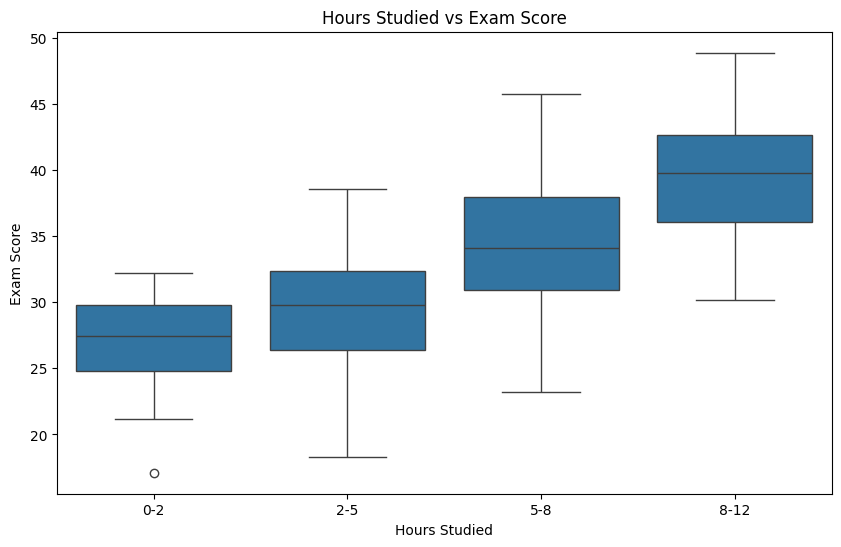

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hours_range', y='exam_score', data=df_students)
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

Aqui observamos que os dados seguem uma correlação com as horas de estudo e nota da prova. Quanto mais horas de estudo, maior será a nota.

Text(0, 0.5, 'Exam Score')

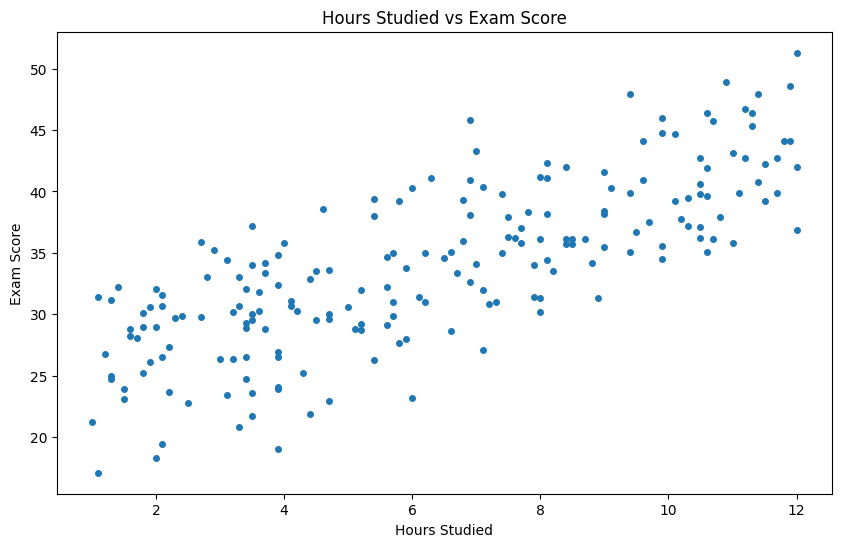

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_students['hours_studied'], df_students['exam_score'], 'o', markersize=4)
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

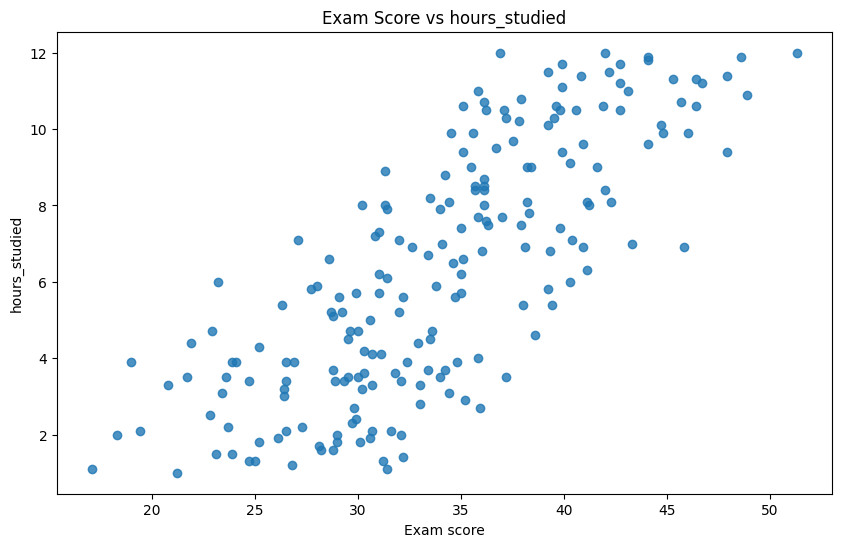

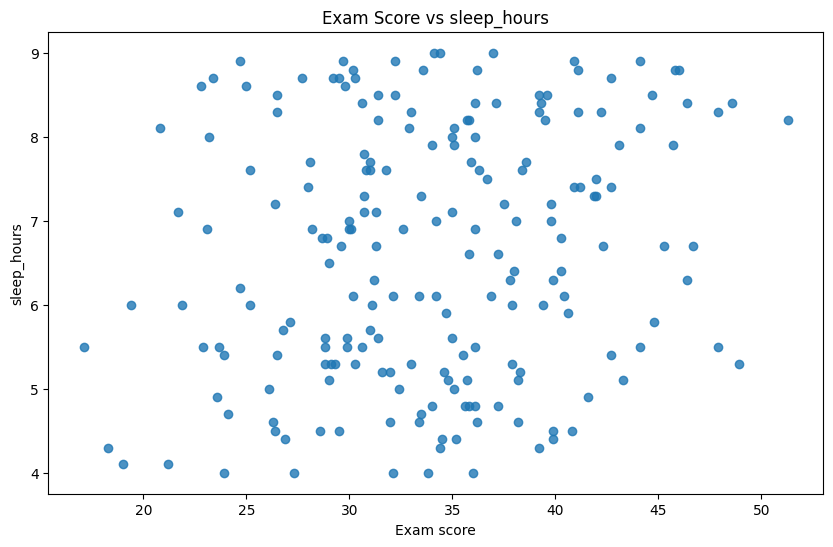

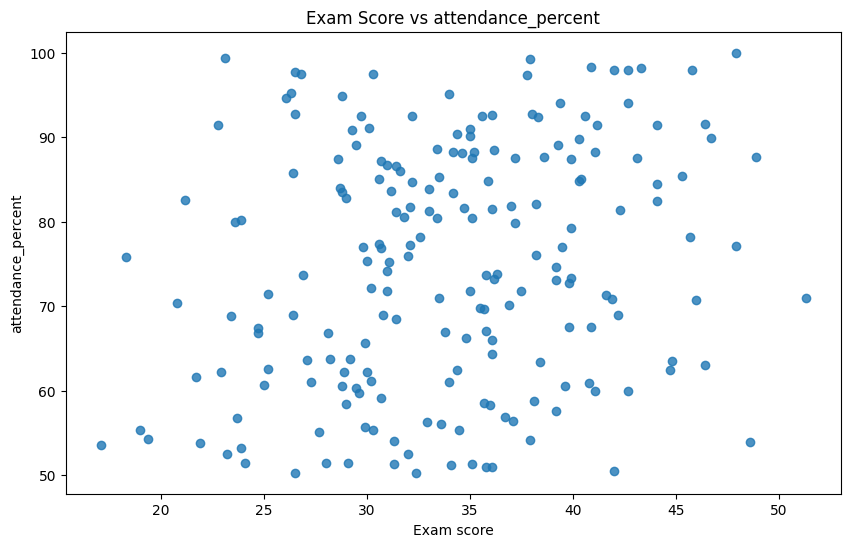

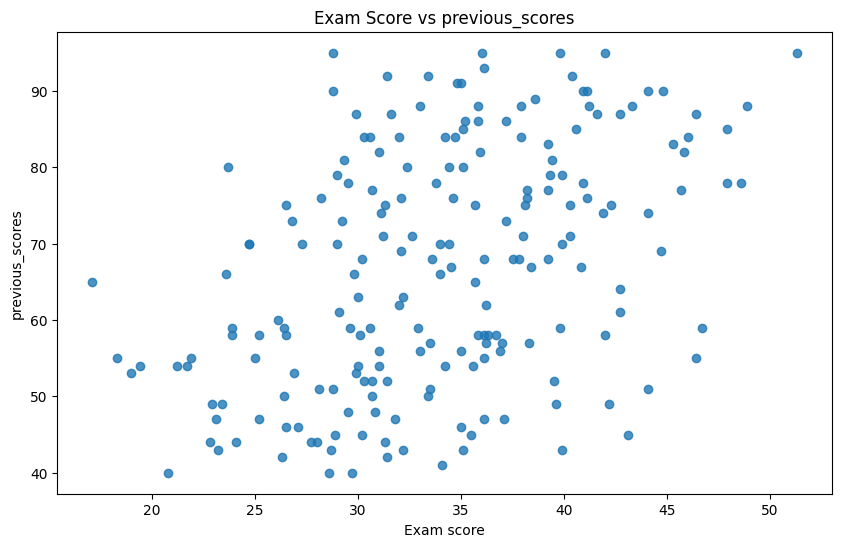

In [ ]:
numerical_cols = ['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores']

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_students['exam_score'], df_students[col], alpha=0.8)
    plt.title( f'Exam Score vs {col}')
    plt.xlabel('Exam score')
    plt.ylabel(col)
    plt.show()

Observamos que as outras colunas não tem uma relação muito forte com a nota da prova, exceto pelas horas de estudo, que é possível ver uma concentração.
- Ideia: seria interessante treinar um modelo para determinar que tipo de nota (alta ou baixa) o aluno pode tirar com base em `previous_score` e nas outras features. Talvez possa ser aplicado Regressão Logística nesse caso. Prever se o aluno vai tirar nota alta ou baixa com base na nota passada e comparar com a real.

In [ ]:
for col in numerical_cols:
    correlation_matrix = df_students['exam_score'].corr(df_students[col])
    print(f'exam_score x {col} = {correlation_matrix}')

exam_score x hours_studied = 0.7767514349789605
exam_score x sleep_hours = 0.18822198470447812
exam_score x attendance_percent = 0.22571260459020465
exam_score x previous_scores = 0.4311047112479791


aqui vemos que a única coluna que tem a relação muito forte com a nota é as horas de estudo.

# Linnear Regression

### Definir variáveis de treino e teste (x e y)
- treinar o modelo


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_students[['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores']]
y = df_students['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test) #usa o modelo treinado para prever valores a partir do conjunto de teste (X_test)

### Verificando o modelo pelo MSE e R²
- MSE - tamanho médio do erro” (quanto menor, melhor)
- R² - quanto o modelo explica os dados (quanto mais perto de 1, melhor)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 7.761782668623075
R-squared: 0.8537447137159516


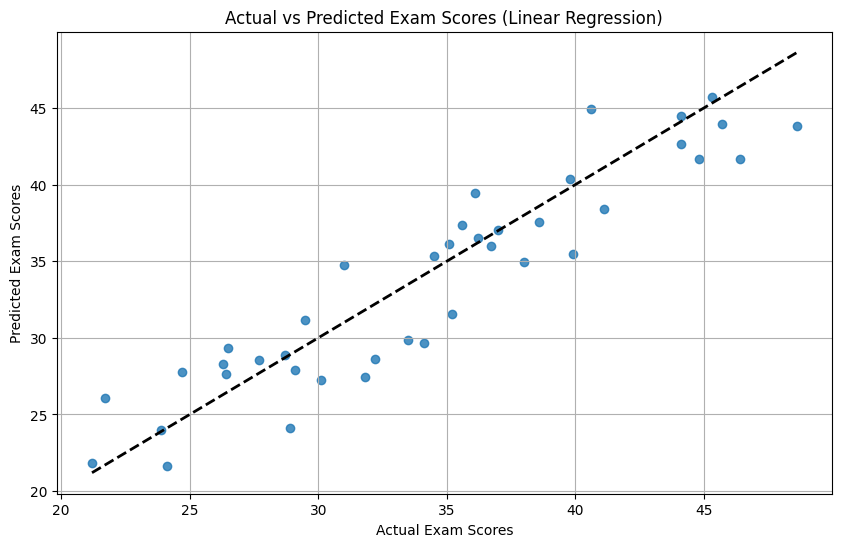

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model.predict(X_test), alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add the diagonal line
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores (Linear Regression)")
plt.grid(True)
plt.show()

## With Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)

print("Coeficientes ElasticNet:", elastic.coef_)

Coeficientes ElasticNet: [1.53841078 0.84016271 0.10877921 0.18193787]


Os pesos definidos em cada feature. Horas de estudo, tem o peso mais forte, enquanto a feature de frequências, tem o peso mais baixo, por ser considerada quase irrelevante

In [ ]:
y_pred_elastic = elastic.predict(X_test)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f'Mean Squared Error (ElasticNet): {mse_elastic}')
print(f'R-squared (ElasticNet): {r2_elastic}')

Mean Squared Error (ElasticNet): 7.836944388343364
R-squared (ElasticNet): 0.8523284412815623


Oberserva-se que comparando com a Regressão Linear, ele fica praticamente igual, visto que pra esse modelo, seria mais interessante testar com muitas colunas, o que não se encaixaria muito bem nesse dataset.